### 2. Выбор модели для прогнозирования   ЕП РФ

In [84]:
library(forecast)
library(ggplot2)
library(dplyr)

## Aggregated TS

In [86]:
df_eu  <-  read.csv(file="hts_rus_summed.csv", header=TRUE, sep=",", row.names =1 )

In [87]:
gdp_agg <- df_eu_sums <-  rowSums(df_eu)

In [88]:
gdp_agg %>% head()

2006-01-01 2006-02-01 2006-03-01 2006-04-01 2006-05-01 2006-06-01 
    -99636     -67539     -65908     -59589     -68708     -53946

In [89]:
gdp_agg  <- ts(gdp_agg, frequency = 12, start = 2006) 
gdp_agg

        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
2006 -99636 -67539 -65908 -59589 -68708 -53946 -41476 -36599 -40643 -51480
2007 -65331 -45760 -55002 -51414 -51580 -38076 -27011 -22570 -22195 -27747
2008 -59214 -35343 -44824 -38694 -45076 -34464 -13112  -9811 -18353 -15841
2009 -47976 -24401 -32121 -27017 -28463 -19821  -4237   1050  -3263 -12170
2010 -43945 -25686 -17671 -20057 -23567 -11226 -23813 -32341  -8550  -9346
2011 -37554 -21449 -20237 -21499 -28733  -9348   -776  10742   4154  -2658
2012 -21840  -8007  -5103 -13503  -8493     19  13287  22761  11479  10190
2013 -21804  -5608 -15157  -9048  -8227   6992  23186  23066  11709  11702
2014 -14727  -1700  -6177  -2526  -5848   6309  23731  19854  12060  10071
2015 -25453 -12145 -14835  -7712  -5673   4497  26076  23541  18543  14250
2016 -27719  -7767    834  -3050  -3848   9358  18466  21879   9990   2149
2017 -42866 -19974 -13281 -16692 -19053  -7468   4916   9856  -1614  -8689
2018 -30308 -20506 -36471

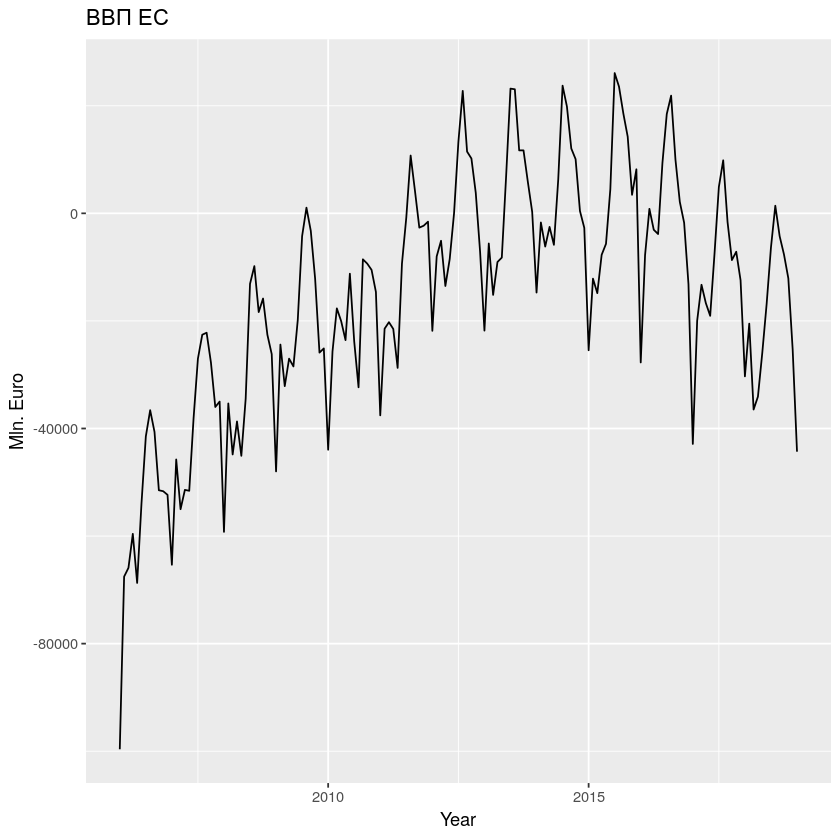

In [90]:
autoplot(gdp_agg) +
    xlab("Year") + ylab("Mln. Euro") +
    ggtitle("ВВП ЕС") 

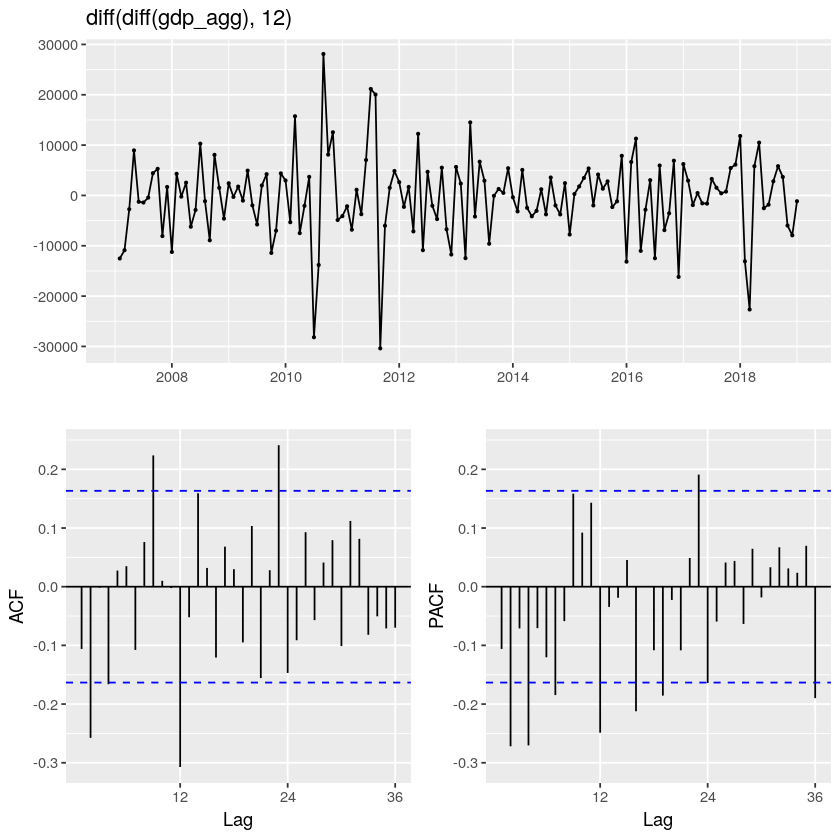

In [91]:
ggtsdisplay(diff(diff(gdp_agg),12))

In [92]:
train <- window(gdp_agg, end=c(2016,12))
test <- window(gdp_agg, start=c(2017,1))

#### Модель 0: RW with drift

The random walk with drift model is

$$Y_t=c + Y_{t-1} + Z_t$$

``rwf(y, h, drift=TRUE)``

#### Модель 1: Theta

``library(foreast)``

Equivalent to simple exponential smoothing with drift 

$\sim$ ETS(AAdN)

In [93]:
ets(train)

ETS(A,Ad,A) 

Call:
 ets(y = train) 

  Smoothing parameters:
    alpha = 0.4788 
    beta  = 1e-04 
    gamma = 1e-04 
    phi   = 0.9774 

  Initial states:
    l = -65071.6052 
    b = 1572.3385 
    s = -1469.216 1146.333 7889.811 12200.47 16202.75 14367.6
           2878.54 -9125.435 -6769.036 -8132.27 -5640.73 -23548.81

  sigma:  6041.164

     AIC     AICc      BIC 
2960.808 2966.861 3012.698 

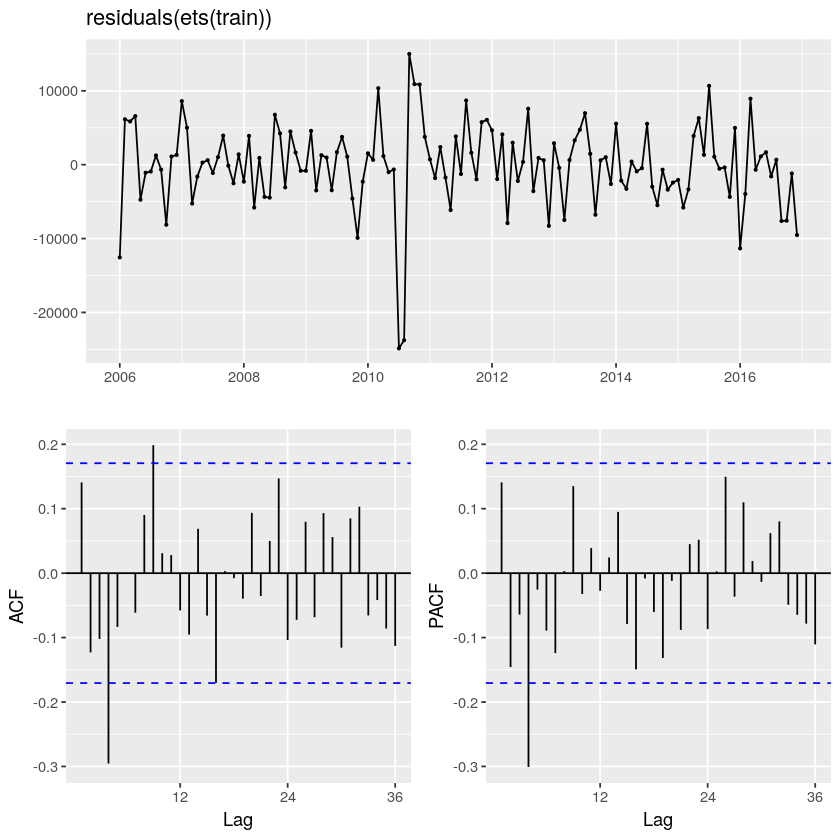

In [94]:
ggtsdisplay(residuals(ets(train)))

In [95]:
auto.arima(train)

Series: train 
ARIMA(0,1,2)(0,1,1)[12] 

Coefficients:
          ma1      ma2     sma1
      -0.3092  -0.3235  -0.7914
s.e.   0.1009   0.1063   0.1126

sigma^2 estimated as 39173718:  log likelihood=-1213.72
AIC=2435.45   AICc=2435.8   BIC=2446.56

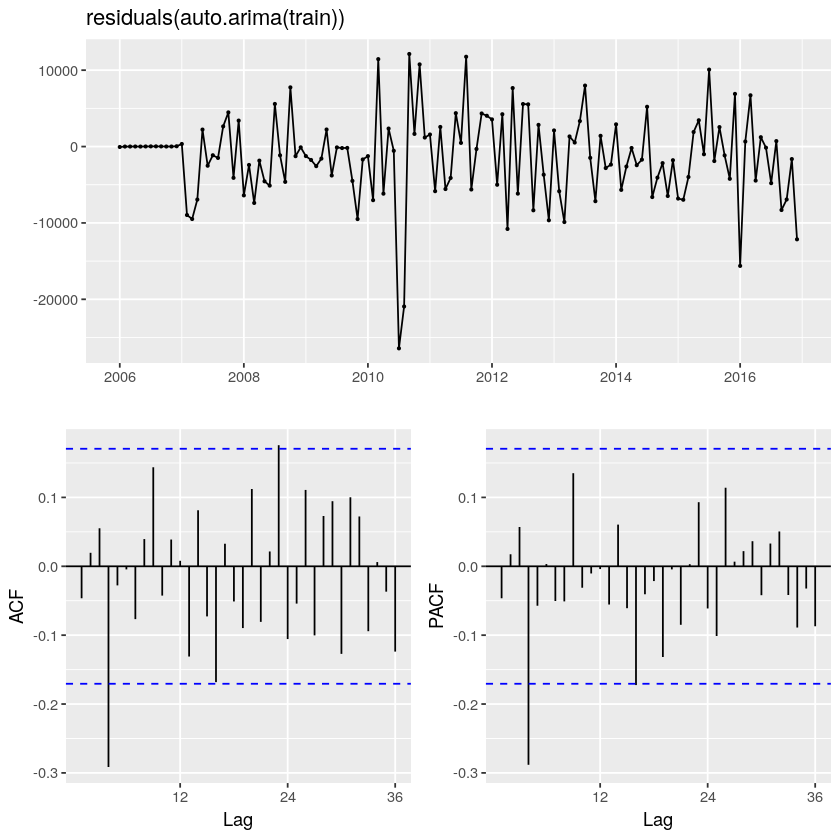

In [96]:
ggtsdisplay(residuals(auto.arima(train)))

In [97]:
Arima(train, order=c(2,1,2), seasonal=c(2,1,2))

Series: train 
ARIMA(2,1,2)(2,1,2)[12] 

Coefficients:
          ar1     ar2     ma1      ma2     sar1    sar2     sma1     sma2
      -0.3612  0.2165  0.0790  -0.6517  -0.7420  0.1045  -0.0122  -0.7222
s.e.   0.1675  0.1532  0.1327   0.1225   1.5794  0.1848   1.6064   1.3097

sigma^2 estimated as 39114834:  log likelihood=-1211.91
AIC=2441.82   AICc=2443.48   BIC=2466.84

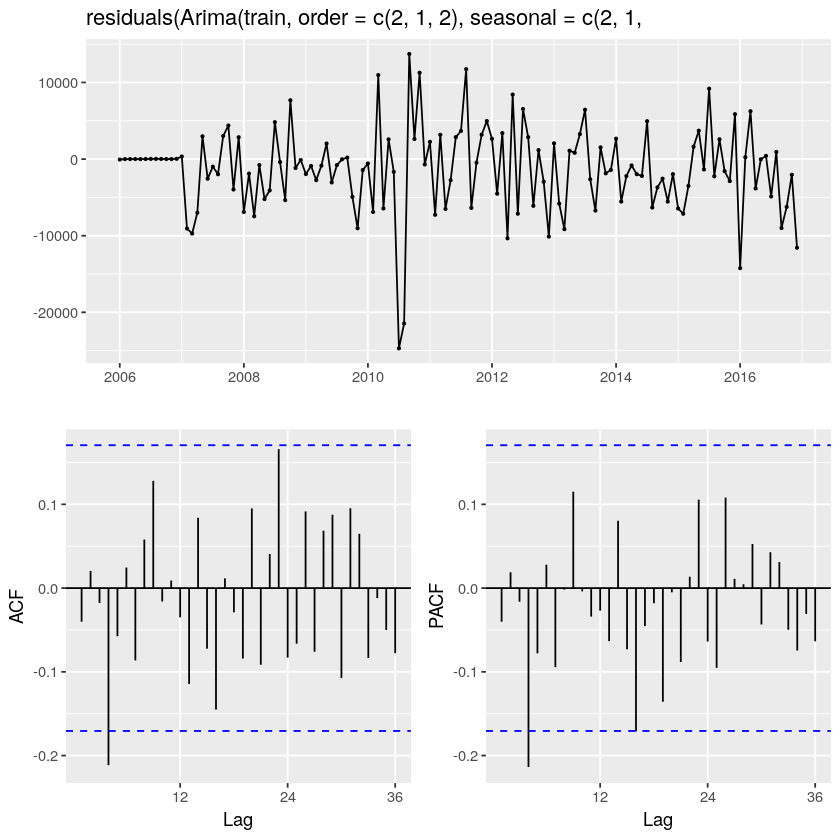

In [98]:
ggtsdisplay(residuals(Arima(train, order=c(2,1,2), seasonal=c(2,1,2))))

###### DM test on in-sample one-step forecasts 

In [99]:
dm.test(residuals(ets(train)),residuals(auto.arima(train)),h=1, power = 2)


	Diebold-Mariano Test

data:  residuals(ets(train))residuals(auto.arima(train))
DM = -0.89365, Forecast horizon = 1, Loss function power = 2, p-value =
0.3731
alternative hypothesis: two.sided


In [100]:
dm.test(residuals(ets(train)),residuals(auto.arima(train)), alternative="less", h=1, power = 2)


	Diebold-Mariano Test

data:  residuals(ets(train))residuals(auto.arima(train))
DM = -0.89365, Forecast horizon = 1, Loss function power = 2, p-value =
0.1866
alternative hypothesis: less


In [101]:
dm.test(residuals(Arima(train, order=c(2,1,2), seasonal=c(2,1,2))),residuals(auto.arima(train)),alternative="less", h=1, power = 2)


	Diebold-Mariano Test

data:  residuals(Arima(train, order = c(2, 1, 2), seasonal = c(2, 1,     2)))residuals(auto.arima(train))
DM = -1.5209, Forecast horizon = 1, Loss function power = 2, p-value =
0.06534
alternative hypothesis: less


In [102]:
length(test)

[1] 25

In [103]:
gdp_rwf <- rwf(train,h=25)
gdp_rwfwd <- rwf(train,h=25, drift=TRUE)
gdp_snaive  <- snaive(train,h=25)
# gdp_theta  <- thetaf(train, h=25) ???
gdp_arima  <- forecast(Arima(train, order=c(2,1,2), seasonal=c(2,1,2)), h=25)
gdp_auto_arima  <- forecast(auto.arima(train, stationary = FALSE, seasonal = TRUE, lambda="auto"), h=25)
gdp_ets <- forecast(ets(train), h=25)

In [104]:
cat("RW")
accuracy(gdp_rwf, test)[, c(2,5,7,8)]
cat("RW with drift ")
accuracy(gdp_rwfwd, test)[, c(2,5,7,8)]
cat("SNaive")
accuracy(gdp_snaive, test)[, c(2,5,7,8)]
# cat("Theta")
# accuracy(gdp_theta, test)[, c(2,5,7,8)]
cat("ARIMA")
accuracy(gdp_arima, test)[, c(2,5,7,8)]
cat("Auto ARIMA")
accuracy(gdp_auto_arima, test)[, c(2,5,7,8)]
cat("ETS")
accuracy(gdp_ets, test)[, c(2,5,7,8)]

RW

,RMSE,MAPE,ACF1,Theil's U
Training set,11531.02,469.0393,-0.1421609,NA
Test set,14204.25,141.4812,0.5640063,1.361271


RW with drift 

,RMSE,MAPE,ACF1,Theil's U
Training set,11512.12,444.34626,-0.1421609,NA
Test set,18894.72,97.12677,0.6173133,1.080711


SNaive

,RMSE,MAPE,ACF1,Theil's U
Training set,11615.18,575.7678,0.6010402,NA
Test set,17261.85,195.7287,0.6831908,1.950867


ARIMA

,RMSE,MAPE,ACF1,Theil's U
Training set,5735.156,344.1934,-0.04016493,NA
Test set,16288.313,189.8155,0.68127627,2.451983


Auto ARIMA

,RMSE,MAPE,ACF1,Theil's U
Training set,5834.988,294.9815,-0.04734272,NA
Test set,15444.628,180.0117,0.65862964,2.314673


ETS

,RMSE,MAPE,ACF1,Theil's U
Training set,5638.747,148.3019,0.1408629,NA
Test set,10980.156,106.1166,0.5549177,1.544246


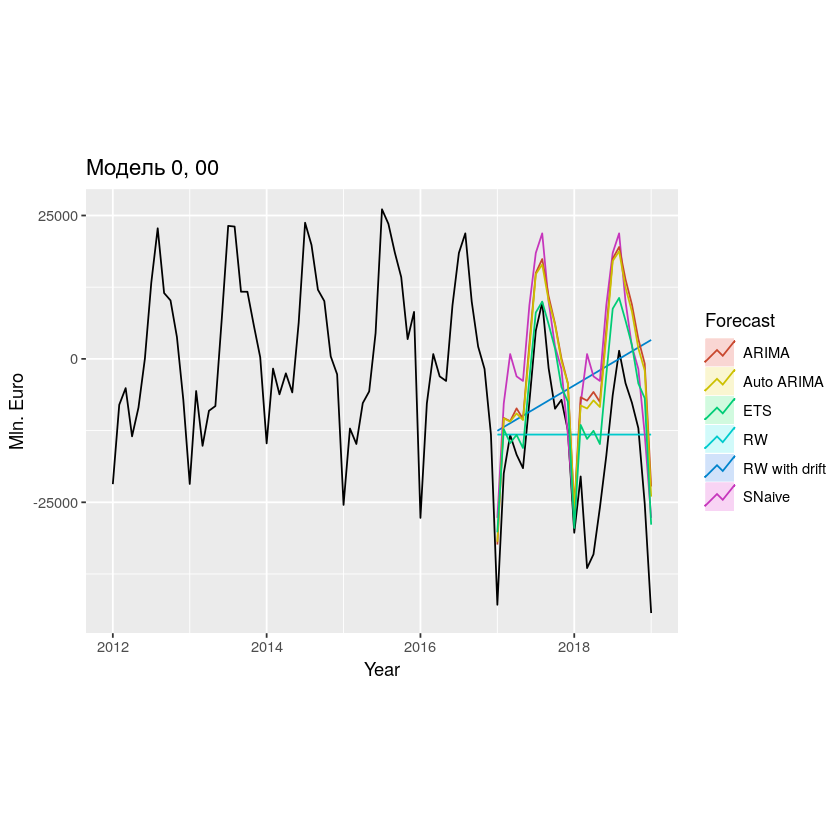

In [105]:
autoplot(window(gdp_agg, start=2012)) +
    autolayer(gdp_rwf, series="RW", PI=FALSE) +
    autolayer(gdp_rwfwd, series="RW with drift", PI=FALSE) +
    autolayer(gdp_snaive, series="SNaive", PI=FALSE) +
#     autolayer(gdp_theta, series="Theta Method", PI=FALSE) +
    autolayer(gdp_arima, series="ARIMA", PI=FALSE) +
    autolayer(gdp_auto_arima, series="Auto ARIMA", PI=FALSE) +
    autolayer(gdp_ets, series="ETS", PI=FALSE) +
    xlab("Year") + ylab("Mln. Euro") +
    ggtitle("Модель 0, 00") +
    guides(colour=guide_legend(title="Forecast")) +
    theme(aspect.ratio = 0.75)

## Disaggregated TS

In [106]:
library(data.table)

In [107]:
df_eu = as.data.table(df_eu)

In [108]:
df_gdp_check  <- df_eu_sums

In [109]:
library(hts)  

In [110]:
data  <-  df_eu

In [111]:
head(data)

АДЫГРО,АДЫГУБ,АДЫГУВ,АДЫГУУ,АЛТАРО,АЛТАУБ,АЛТАУВ,АЛТАУУ,АЛТКРО,АЛТКУБ,⋯,ЧУКОУВ,ЧУКОУУ,ЯКУТРО,ЯКУТУБ,ЯКУТУВ,ЯКУТУУ,ЯРОСРО,ЯРОСУБ,ЯРОСУВ,ЯРОСУУ
362,-478,-111,-12,249,-181,-68,-19,1922,-3116,⋯,-10,-7,961,-610,-209,-55,950,-1796,-435,-49
315,-457,-96,-5,266,-136,-50,-17,1917,-2616,⋯,-12,-6,1078,-509,-155,-54,974,-1631,-349,-34
380,-552,-90,-10,295,-199,-43,-23,2293,-2742,⋯,-11,-5,1252,-506,-171,-70,1115,-1752,-363,-52
351,-464,-81,-15,302,-165,-40,-20,1921,-2569,⋯,-9,-2,1103,-468,-147,-66,912,-1566,-348,-54
361,-499,-85,-18,273,-198,-55,-24,2137,-2822,⋯,-24,-2,1189,-529,-192,-93,1094,-1781,-349,-61
372,-445,-77,-13,297,-150,-56,-25,2176,-2600,⋯,-14,0,1131,-501,-181,-73,1057,-1585,-358,-55


In [112]:
# rownames(data) = as.Date(data$X0)
# data$X0 <- NULL

In [113]:
dim(data)

[1] 157 328

In [114]:
y = hts(data, characters = c(4,2))
s = smatrix(y)

In [115]:
head(s)

1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
1,1,1,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,1,1,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,1,1,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [116]:
length(train)
length(test)
132+25

[1] 132

[1] 25

[1] 157

In [117]:
gts_train  <- window(y, start=1, end=132)
gts_test  <- window(y, start=133, end=157)

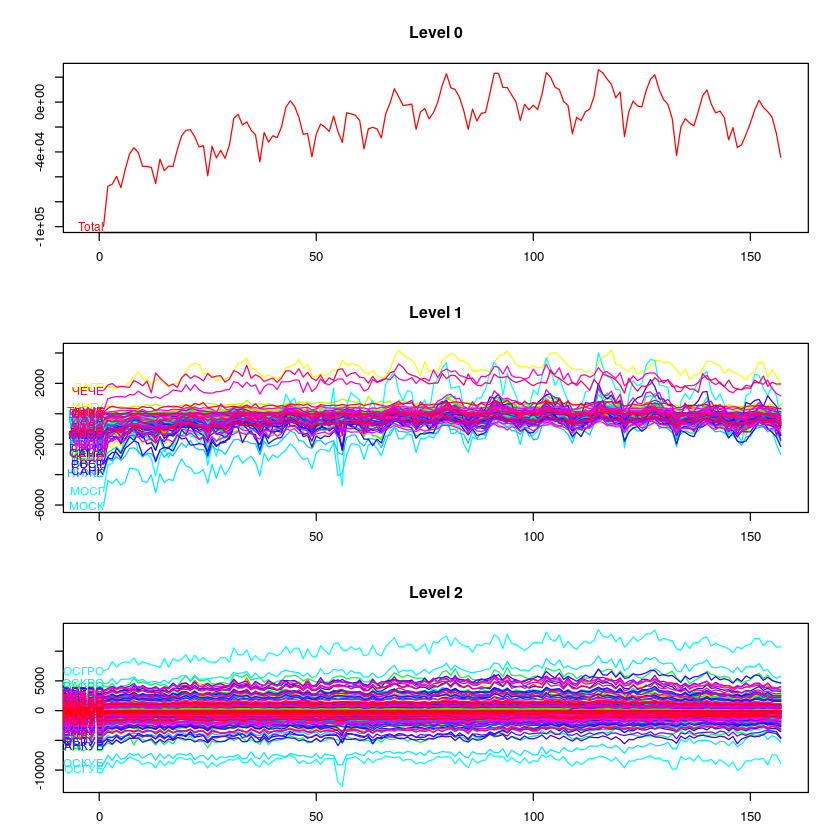

In [118]:
plot(y, levels = c(0, 1, 2), color_lab = TRUE )

- method = c("comb", "bu", "mo", "tdgsa", "tdgsf", "tdfp")
- weights = c("wls", "ols", "mint", "nseries")
    - "ols" uses an unweighted combination
    - "wls" uses weights based on forecast variances 
    - "mint" uses a full covariance estimate to determine the weights 
    - "nseries" uses weights based on the number of series aggregated at each node.
- algorithms = c("lu", "cg", "chol", "recursive", "slm"), when method=="comb"
    - "lu" indicates LU decomposition is used
    - "cg" indicates a conjugate gradient method 
    - "chol" corresponds to a Cholesky decomposition
    - "recursive" indicates the recursive hierarchical algorithm of Hyndman et al (2015)
    - "slm" uses sparse linear regression. Note that algorithms = "recursive" and algorithms = "slm" cannot be used if weights="mint".
- covariance = c("shr", "sam"), to be used with weights="mint"
    - either a shrinkage estimator ("shr") with shrinkage towards the diagonal
    - a sample covariance matrix ("sam").


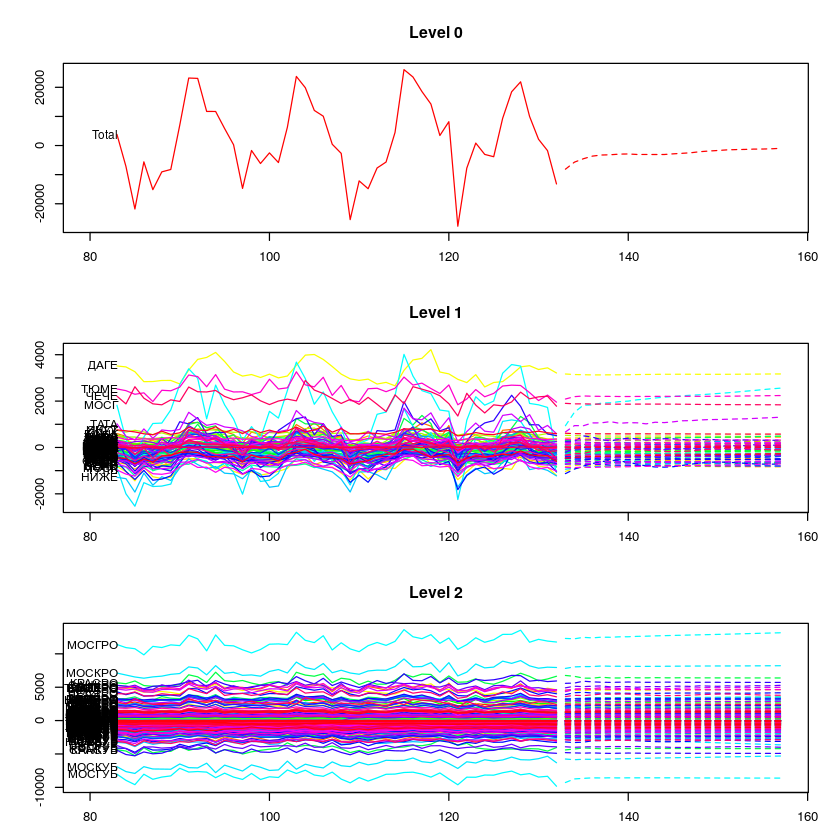

In [120]:
gdpforecast <- forecast(gts_train, h=25, weights = "wls", method="comb", algorithms = "recursive",  fmethod = "arima")

plot(gdpforecast, include=50)

In [121]:
accuracy.gts(gdpforecast, gts_test)

,Total,АДЫГ,АЛТА,АЛТК,АМУР,АРХА,АСТР,БАШК,БЕЛГ,БРЯН,⋯,ЧУКОУВ,ЧУКОУУ,ЯКУТРО,ЯКУТУБ,ЯКУТУВ,ЯКУТУУ,ЯРОСРО,ЯРОСУБ,ЯРОСУВ,ЯРОСУУ
ME,-13123.843987,-13.2047472,-10.2353363,-358.255270,-96.135663,-197.637166,-20.581667,-440.030267,-48.198643,7.184538,⋯,0.4308547,1.5099055,-163.680163,21.5906272,24.787996,10.424468,-257.940469,36.4591689,36.558092,0.7247355
RMSE,18983.373047,52.0827054,29.2456697,450.384351,135.441840,249.064284,145.164615,574.259292,160.916984,150.830263,⋯,3.2261119,2.0744908,194.161007,52.5408415,28.369658,13.494652,280.610541,99.4713270,67.518002,4.5072501
MAE,15115.015146,42.6668837,24.8426098,372.775558,109.679173,197.637166,127.981692,455.154412,130.600947,131.144597,⋯,2.5270696,1.7997271,167.606405,40.9758939,25.038559,11.367261,258.516419,83.3151345,48.309358,3.7478073
MAPE,90.875307,Inf,28.4204497,44.692712,91.095329,61.532051,125.072067,302.370595,26.959092,24.108603,⋯,31.4000620,124.5550196,15.951153,9.5301638,18.411196,42.985520,25.445277,8.3727485,9.559635,28.9514479
MPE,83.640113,Inf,-18.0240795,39.717850,64.578434,61.532051,125.072067,238.492745,-1.097112,-8.067785,⋯,-17.9257469,-119.2761674,-15.655502,-5.8658986,-18.264497,-41.137985,-25.401939,-4.3683045,-7.689075,-13.6530354
MASE,1.659539,0.9335831,0.7334645,1.903102,1.382067,1.817003,1.139509,1.581152,1.128693,1.018856,⋯,0.5348079,0.7965008,1.552021,0.8344228,1.166863,1.076725,2.466724,0.7236628,1.209581,0.5572789


In [122]:
cat("ARIMA")
accuracy(gdp_arima, test)[, c(2,5,7,8)]
cat("Auto ARIMA")
accuracy(gdp_auto_arima, test)[, c(2,5,7,8)]

ARIMA

,RMSE,MAPE,ACF1,Theil's U
Training set,5735.156,344.1934,-0.04016493,NA
Test set,16288.313,189.8155,0.68127627,2.451983


Auto ARIMA

,RMSE,MAPE,ACF1,Theil's U
Training set,5834.988,294.9815,-0.04734272,NA
Test set,15444.628,180.0117,0.65862964,2.314673


### Theta

In [123]:
allts <- aggts(gts_train)

In [124]:
allf <- matrix(, nrow=25, ncol=ncol(allts))

In [125]:
# Select preferred time-series forecasting method for each time series
for(i in 1:ncol(allts))
  allf[,i] <- thetaf(msts(allts[,i], seasonal.periods = 12), h=25)$mean
allf <- ts(allf)

In [126]:
# forecast(auto.arima(train), h=7)$mean

In [127]:
colnames(allf)  <-   colnames(allts)  

In [128]:
# combine the forecasts with the group matrix to get a gts object
g <- get_nodes(gts_train)
y.f <- combinef(allf, nodes = g)

In [129]:
forecasts_7 = y.f[[1]]

In [130]:
colnames(forecasts_7) = colnames(y[[1]])

In [131]:
data_f5 = rbind(gts_train[[1]], forecasts_7)

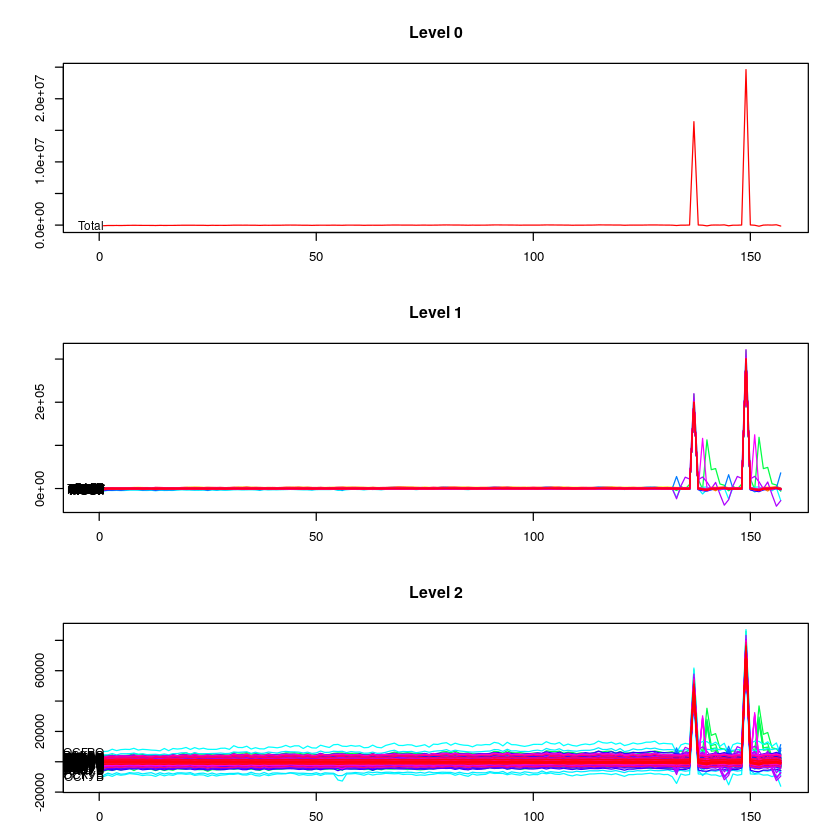

In [132]:
y_f5 = hts(data_f5, characters = c(4,2))

plot(y_f5, levels = c(0, 1, 2))

In [133]:
gts_forecasts_7  <- window(y_f5, start=133, end=157)

In [134]:
accuracy.gts(gts_forecasts_7, gts_test)

,Total,АДЫГ,АЛТА,АЛТК,АМУР,АРХА,АСТР,БАШК,БЕЛГ,БРЯН,⋯,ЧУКОУВ,ЧУКОУУ,ЯКУТРО,ЯКУТУБ,ЯКУТУВ,ЯКУТУУ,ЯРОСРО,ЯРОСУБ,ЯРОСУВ,ЯРОСУУ
ME,-1631382.476,-19320.61,-19292.33,-19804.953,-19369.63,-19153.866,-19378.74,-19387.773,-19434.835,-19381.242,⋯,-4815.569,-4813.526,-4982.2692,-4805.0408,-4796.352,-4806.823,-5011.4841,-4742.0396,-4764.6879,-4796.654
RMSE,5918654.050,72014.05,71994.55,72176.623,72018.98,71947.980,72015.81,72165.635,72039.630,72030.648,⋯,17998.125,17997.581,17999.2174,18009.4486,17993.075,17996.427,18036.5018,17985.1472,17994.2109,17991.376
MAE,1677177.339,20791.65,20808.61,20710.552,20771.27,20858.399,20815.94,21401.719,20733.183,20763.504,⋯,5206.040,5206.896,5208.6887,5216.2072,5220.501,5210.495,5208.0384,5249.5017,5228.1205,5216.164
MAPE,7958.595,Inf,18885.85,2259.154,15434.93,6852.884,24466.95,8359.372,3389.107,3013.315,⋯,46551.118,170824.604,426.1996,1008.9889,3685.828,12600.076,468.0162,496.5173,875.2229,31937.837
MPE,7879.580,Inf,-17351.06,2058.432,13390.21,6042.232,23707.99,3217.086,2996.684,2711.642,⋯,41693.585,151188.099,-407.3840,919.4642,3389.163,11439.955,-451.5511,444.1821,793.5143,28957.501


### ARIMA

In [136]:
allts <- aggts(gts_train)

In [137]:
allf <- matrix(, nrow=25, ncol=ncol(allts))

In [138]:
# library(doParallel)
library(doMC)
options(cores = 8)
registerDoMC()

Loading required package: foreach
Loading required package: iterators
Loading required package: parallel


In [139]:
start_time <- Sys.time()
ms <-  foreach(i=1:ncol(allts)) %dopar% {
    model  <- auto.arima(msts(allts[,i], seasonal.periods = 12), stationary = FALSE, seasonal = TRUE)
    }
end_time <- Sys.time()
end_time - start_time

Time difference of 8.117766 mins

In [155]:
for(i in 1:ncol(allts)){
    allf[,i] <- forecast(ms[[i]], h=25)$mean
    }

In [156]:
allf <- ts(allf)

In [157]:
colnames(allf)  <-  colnames(allts)  

In [158]:
# combine the forecasts with the group matrix to get a gts object
g <- get_nodes(gts_train)
y.f <- combinef(allf, nodes = g)

In [159]:
forecasts_7 = y.f[[1]]

In [160]:
colnames(forecasts_7) = colnames(y[[1]])

In [161]:
data_f5 = rbind(gts_train[[1]], forecasts_7)

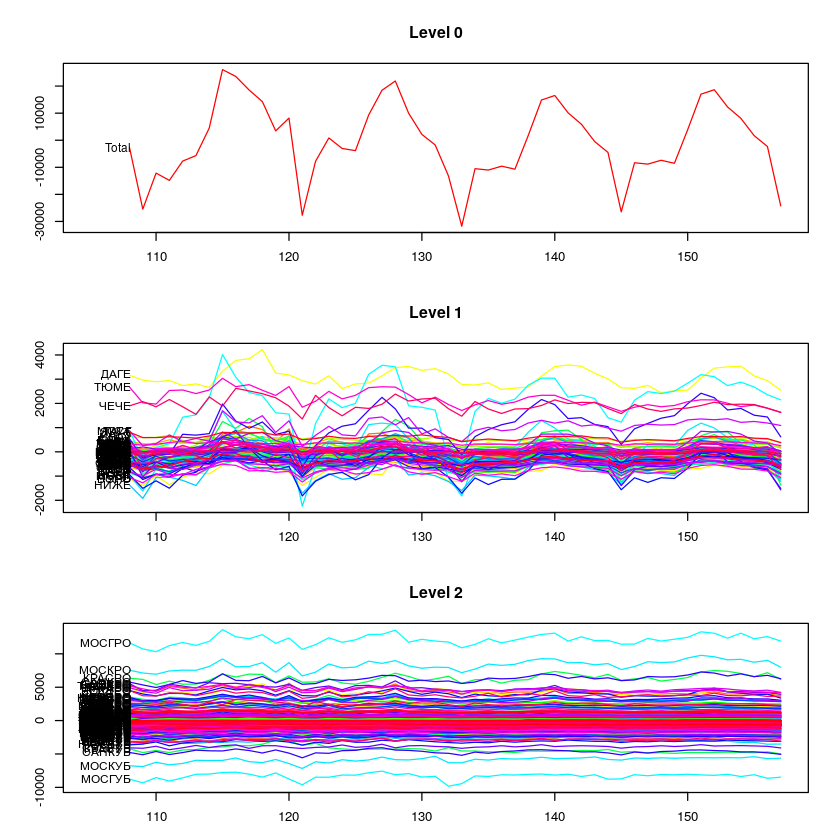

In [162]:
y_f5 = hts(data_f5, characters = c(4,2))

plot(y_f5, levels = c(0, 1, 2), include = 50)

In [163]:
gts_forecasts_7  <- window(y_f5, start=133, end=157)

In [164]:
accuracy.gts(gts_forecasts_7, gts_test)

,Total,АДЫГ,АЛТА,АЛТК,АМУР,АРХА,АСТР,БАШК,БЕЛГ,БРЯН,⋯,ЧУКОУВ,ЧУКОУУ,ЯКУТРО,ЯКУТУБ,ЯКУТУВ,ЯКУТУУ,ЯРОСРО,ЯРОСУБ,ЯРОСУВ,ЯРОСУУ
ME,-13729.74189,-37.29960,-6.245816,-297.83511,-7.047462,-85.80030,-101.23619,-273.4642,-171.06645,-111.68177,⋯,4.323486,6.097455,-103.41769,10.432103,22.38639,6.172546,-219.11023,46.195445,58.86018,-23.00562
RMSE,15339.07346,75.48564,43.085312,343.37948,64.104192,136.39634,143.02512,360.1087,196.25766,143.76901,⋯,11.817483,11.489979,138.14867,43.202287,32.49555,17.411526,242.78314,89.715983,85.92146,34.30941
MAE,13729.74189,61.10112,34.630168,297.83511,50.615132,106.36621,112.51318,297.4380,171.06645,119.68863,⋯,9.661094,9.091897,116.35937,31.815176,27.64429,14.563272,220.63626,73.955090,66.37828,29.19373
MAPE,178.95310,Inf,36.747077,41.50207,59.582022,40.03833,133.10059,345.5047,35.43967,20.64341,⋯,104.379876,454.572097,11.04432,7.351591,20.09470,47.895784,21.56824,7.554494,12.89971,221.33202
MPE,59.60742,-Inf,-8.330835,41.50207,-2.125442,28.35691,48.28426,239.7881,35.43967,19.20828,⋯,-61.379420,-237.096244,-10.03028,-3.207255,-16.79708,-25.456533,-21.43186,-5.194857,-11.65388,175.92290


In [165]:
cat("ARIMA")
accuracy(gdp_arima, test)[, c(2,5,7,8)]
cat("Auto ARIMA")
accuracy(gdp_auto_arima, test)[, c(2,5,7,8)]

ARIMA

,RMSE,MAPE,ACF1,Theil's U
Training set,5735.156,344.1934,-0.04016493,NA
Test set,16288.313,189.8155,0.68127627,2.451983


Auto ARIMA

,RMSE,MAPE,ACF1,Theil's U
Training set,5834.988,294.9815,-0.04734272,NA
Test set,15444.628,180.0117,0.65862964,2.314673


#### Модель 3: ARIMAX 

- лучшие предикторы - близкие ряды?



##### Выбор самых близких друг к другу рядов (autoarima)

- "ACF" Autocorrelation-based method. See diss.ACF.

- "PACF" Partial Autocorrelation-based method. See diss.PACF.

- "COR" Correlation-based method. See diss.COR.

- "CORT" Temporal Correlation and Raw values method. See diss.CORT.

- "DTWARP" Dynamic Time Warping method. See diss.DTWARP.

- "EUCL" Euclidean distance. See diss.EUCL. For many more convetional distances, see link[stats]{dist}, though you may need to transpose the dataset.

### DTW 

In [190]:
df_eu  <-  read.csv(file="hts_rus_summed.csv", header=TRUE, sep=",", row.names =1 )

In [191]:
library(TSclust)

In [193]:
df_eu  <- df_eu[50:132, order(names(df_eu))]

In [194]:
corr_mat <- diss(df_eu, "DTWARP")

In [195]:
diss_mat_dtw  <- matrix(0, nrow = dim(data)[2], ncol = dim(data)[2])
i <- j  <- a  <- 1
while (i < dim(data)[2]){
  
  for (j in (i+1):dim(data)[2]){ 
    # cat("(", j, i, ")")
    diss_mat_dtw[j,i] <-  corr_mat[a]
    a <- a+1
    }
  i <-i+1
  }

In [196]:
diss_mat_dtw  <- diss_mat_dtw + t(diss_mat_dtw)
diag(diss_mat_dtw) <- NA

In [197]:
diss_mat_dtw

NA,131246,80825,71285,7981,90513,76331,71992,313533,391937,⋯,71527,70584,127051,146417,94975,76753,105021,259860,118117,72948
131246,NA,47395,58020,115301,35423,51713,56970,460331,246010,⋯,57476,59154,273470,5261,28729,50400,250042,114970,9656,54480
80825,47395,NA,7520,61465,5713,2200,6625,406912,307242,⋯,6883,8337,220191,62515,9008,2194,199113,173794,31478,4654
71285,58020,7520,NA,51979,17657,3714,368,397612,317306,⋯,260,327,210294,72836,22056,4196,189230,185157,43897,810
7981,115301,61465,51979,NA,72856,57369,53291,330625,374239,⋯,52899,51225,144483,130650,76328,58591,123781,240854,99734,54948
90513,35423,5713,17657,72856,NA,11109,16648,418424,295348,⋯,16944,18707,231151,50359,1873,10122,209352,163688,22214,14186
76331,51713,2200,3714,57369,11109,NA,2710,402932,311567,⋯,3021,4944,215764,66827,15251,780,194408,179238,37874,1123
71992,56970,6625,368,53291,16648,2710,NA,398920,316252,⋯,300,771,211562,71797,21157,3185,190323,184172,42973,519
313533,460331,406912,397612,330625,418424,402932,398920,NA,719387,⋯,398493,396860,149558,475835,421813,404184,167926,586029,444552,400503
391937,246010,307242,317306,374239,295348,311567,316252,719387,NA,⋯,316747,318352,532819,227350,290150,310142,509526,78897,255741,314702
156169,20196,66926,81529,134500,60819,75246,80724,479386,211360,⋯,81289,81942,295546,12270,54925,75513,276974,76268,12209,79237


In [198]:
dim(df_eu)

[1]  83 328

In [199]:
dim(diss_mat_dtw)

[1] 328 328

In [200]:
closests_dtw <- c()

for (i in 1:dim(df_eu)[2]){
    closests_dtw  <-  c(closests_dtw, which.min(diss_mat_dtw[i,]) )
}

In [201]:
names_dtw <- c()

for (i in closests_dtw){
    names_dtw  <-  c(names_dtw, colnames(df_eu)[i])
}

In [225]:
iii  <- 520

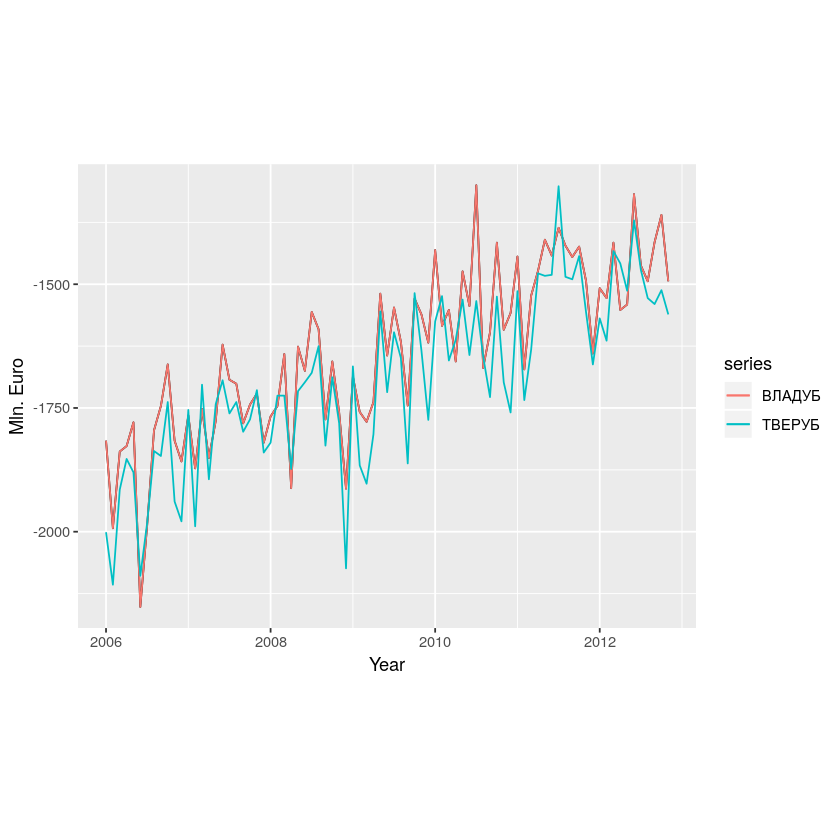

In [203]:
autoplot(ts(df_eu[names_dtw[iii]], frequency = 12, start = 2006)) +
    autolayer(ts(df_eu[names_dtw[iii]], frequency = 12, start = 2006), series=names_dtw[iii]) +
    autolayer(ts(df_eu[iii], frequency = 12, start = 2006), series=colnames(df_eu)[iii]) +
    xlab("Year") + ylab("Mln. Euro") +
    theme(aspect.ratio = 0.75)

In [204]:
length(names_dtw)

[1] 328

In [205]:
names_dtw_1  <-  c(rep(NA, 83), names_dtw)

In [206]:
allts <- aggts(gts_train)

In [207]:
allf <- matrix(, nrow=25, ncol=ncol(allts))

In [208]:
dim(allts)

[1] 132 411

In [209]:
length(names_dtw)+83

[1] 411

In [210]:
for(i in 1:83){
    model  <- auto.arima(msts(allts[,i], seasonal.periods = 12))
    allf[,i] <- forecast(model, h=25)$mean
}

start_time <- Sys.time()

ms <-  foreach(i=84:ncol(allts)) %dopar% {
    auto.arima(msts(allts[,i], seasonal.periods = 12), stationary = FALSE, seasonal = TRUE, xreg = lag(allts[,names_dtw_1[i]][1:length(allts[,names_dtw_1[i]])]))
    
#     forecast(ms[[i]], h=7)$mean

}
end_time <- Sys.time()
end_time - start_time

Time difference of 8.628625 mins

In [211]:
ms[[1]]

Series: msts(allts[, i], seasonal.periods = 12) 
Regression with ARIMA(1,0,2)(1,0,0)[12] errors 

Coefficients:
         ar1      ma1     ma2    sar1  intercept     xreg
      0.6731  -0.6755  0.3782  0.6882   449.5175  -0.0093
s.e.  0.1147   0.1234  0.0962  0.0647    41.9852   0.0779

sigma^2 estimated as 1441:  log likelihood=-663.83
AIC=1341.66   AICc=1342.57   BIC=1361.79

In [212]:
gts_xreg  <- window(y, start=132, end=156)

In [213]:
for(i in 84:ncol(allts)){
    allf[,i] <- forecast(ms[[i-83]], h=25, xreg=gts_xreg[[1]][,names_dtw_1[i]])$mean
    }

Warning message in forecast.Arima(ms[[i - 83]], h = 25, xreg = gts_xreg[[1]][, names_dtw_1[i]]):
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 83]], h = 25, xreg = gts_xreg[[1]][, names_dtw_1[i]]):
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 83]], h = 25, xreg = gts_xreg[[1]][, names_dtw_1[i]]):
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 83]], h = 25, xreg = gts_xreg[[1]][, names_dtw_1[i]]):
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 83]], h = 25, xreg = gts_xreg[[1]][, names_dtw_1[i]]):
“xreg conta

In [214]:
allf <- ts(allf)

In [215]:
colnames(allf)  <-  colnames(allts)  

In [216]:
# combine the forecasts with the group matrix to get a gts object
g <- get_nodes(gts_train)
y.f <- combinef(allf, nodes = g)

In [217]:
forecasts_7 = y.f[[1]]

In [218]:
colnames(forecasts_7) = colnames(y[[1]])

In [219]:
data_f5 = rbind(gts_train[[1]], forecasts_7)

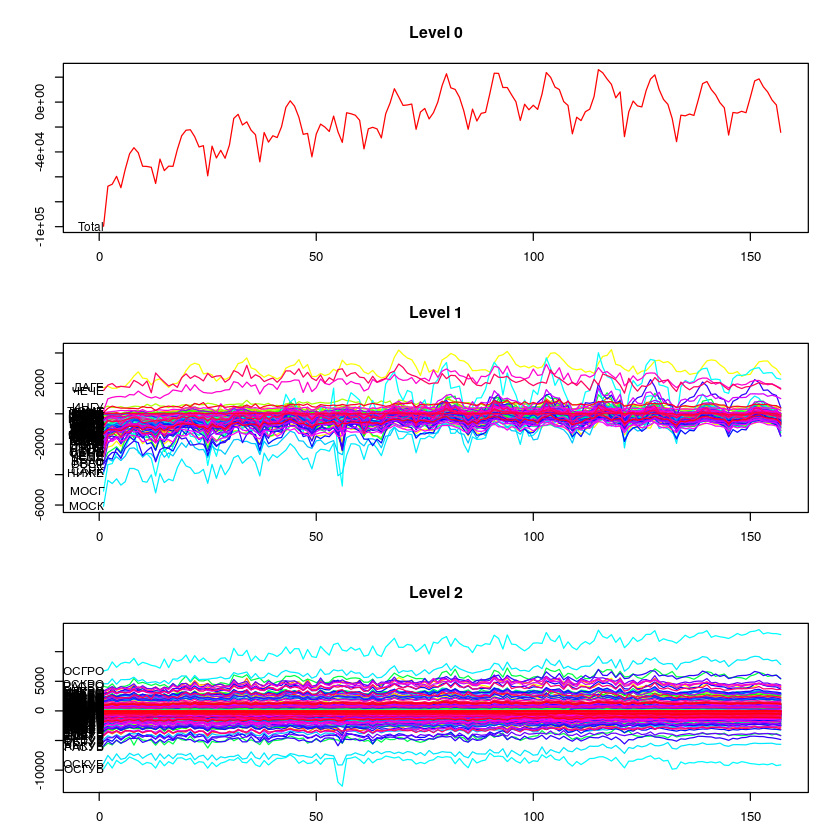

In [220]:
y_f5 = hts(data_f5, characters = c(4,2))

plot(y_f5, levels = c(0, 1, 2))

In [221]:
gts_forecasts_7  <- window(y_f5, start=133, end=157)

In [222]:
accuracy.gts(gts_forecasts_7, gts_test)

,Total,АДЫГ,АЛТА,АЛТК,АМУР,АРХА,АСТР,БАШК,БЕЛГ,БРЯН,⋯,ЧУКОУВ,ЧУКОУУ,ЯКУТРО,ЯКУТУБ,ЯКУТУВ,ЯКУТУУ,ЯРОСРО,ЯРОСУБ,ЯРОСУВ,ЯРОСУУ
ME,-13731.98407,-34.97189,-4.463680,-278.40684,6.026295,-86.38731,-99.87777,-322.5296,-165.83990,-128.36887,⋯,4.376059,6.605076,-109.79389,14.609878,31.55848,5.348499,-205.15959,95.63043,-52.619402,2.176744
RMSE,15341.57308,72.71241,43.550049,326.02519,64.079872,135.84332,139.03394,407.0421,190.93215,157.57560,⋯,12.300070,11.949355,140.25482,50.113941,39.93444,19.272296,226.90509,121.33771,87.344077,24.509434
MAE,13731.98407,58.93897,35.321192,278.40684,47.265246,105.77234,110.99539,340.9375,165.83990,134.17094,⋯,10.117230,9.741768,117.43061,35.734539,33.98922,16.213951,207.81368,105.92782,68.466336,21.064264
MAPE,178.97472,Inf,37.192213,38.18325,53.552047,39.34375,134.51400,391.4795,34.35561,23.54526,⋯,109.016339,489.915452,11.15474,8.309480,24.77579,52.540199,20.27069,10.92223,11.858261,153.388104
MPE,59.61274,-Inf,-6.308921,38.18325,-10.494992,28.32242,57.19847,267.7900,34.35561,22.47834,⋯,-62.512061,-257.019673,-10.55435,-4.216478,-23.21864,-22.050442,-20.03351,-10.09536,8.615228,-14.606349


In [223]:
cat("ARIMA")
accuracy(gdp_arima, test)[, c(2,5,7,8)]
cat("Auto ARIMA")
accuracy(gdp_auto_arima, test)[, c(2,5,7,8)]

ARIMA

,RMSE,MAPE,ACF1,Theil's U
Training set,5735.156,344.1934,-0.04016493,NA
Test set,16288.313,189.8155,0.68127627,2.451983


Auto ARIMA

,RMSE,MAPE,ACF1,Theil's U
Training set,5834.988,294.9815,-0.04734272,NA
Test set,15444.628,180.0117,0.65862964,2.314673


##### Выбор самых близких друг к другу рядов

### abs(COR)

In [231]:
library(TSclust)

In [237]:
df_eu  <-  read.csv(file="hts_rus_summed.csv", header=TRUE, sep=",", row.names =1 )

In [239]:
df_eu  <- df_eu[1:132, order(names(df_eu))]

In [240]:
corr_mat <- diss(df_eu, "COR")

In [241]:
diss_mat_dtw  <- matrix(0, nrow = dim(data)[2], ncol = dim(data)[2])
i <- j  <- a  <- 1
while (i < dim(data)[2]){
  
  for (j in (i+1):dim(data)[2]){ 
    # cat("(", j, i, ")")
    diss_mat_dtw[j,i] <-  corr_mat[a]
    a <- a+1
    }
  i <-i+1
  }

In [242]:
diss_mat_dtw  <- diss_mat_dtw + t(diss_mat_dtw)
diag(diss_mat_dtw) <- NA

In [243]:
closests_dtw <- c()

for (i in 1:dim(df_eu)[2]){
    closests_dtw  <-  c(closests_dtw, which.max(abs(diss_mat_dtw - 1)[i,]) )
}

In [244]:
names_dtw <- c()

for (i in closests_dtw){
    names_dtw  <-  c(names_dtw, colnames(df_eu)[i])
}

In [253]:
iii  <- 200

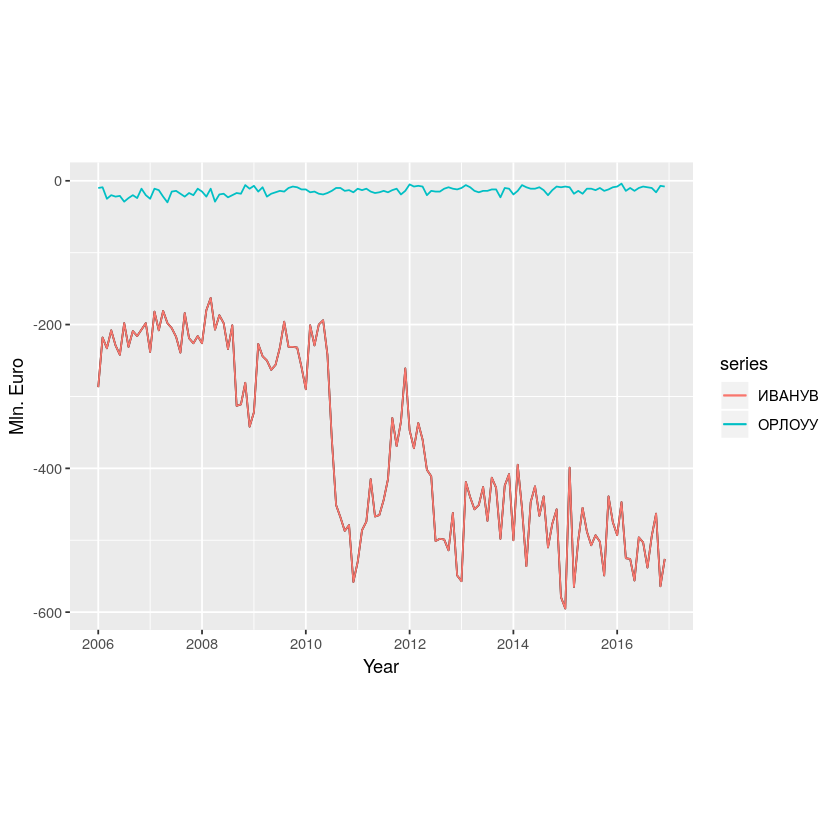

In [254]:
autoplot(ts(df_eu[names_dtw[iii]], frequency = 12, start = 2006)) +
    autolayer(ts(df_eu[names_dtw[iii]], frequency = 12, start = 2006), series=names_dtw[iii]) +
    autolayer(ts(df_eu[iii], frequency = 12, start = 2006), series=colnames(df_eu)[iii]) +
    xlab("Year") + ylab("Mln. Euro") +
    theme(aspect.ratio = 0.75)

In [255]:
length(names_dtw)

[1] 328

In [256]:
names_dtw_1  <-  c(rep(NA, 83), names_dtw)

In [257]:
allts <- aggts(gts_train)

In [258]:
allf <- matrix(, nrow=25, ncol=ncol(allts))

In [259]:
dim(allts)

[1] 132 411

In [260]:
for(i in 1:83){
    model  <- auto.arima(msts(allts[,i], seasonal.periods = 12))
    allf[,i] <- forecast(model, h=25)$mean
}

start_time <- Sys.time()

ms <-  foreach(i=84:ncol(allts)) %dopar% {
    auto.arima(msts(allts[,i], seasonal.periods = 12), stationary = FALSE, seasonal = TRUE,  xreg = lag(allts[,names_dtw_1[i]][1:length(allts[,names_dtw_1[i]])]))
    
#     forecast(ms[[i]], h=7)$mean

}
end_time <- Sys.time()
end_time - start_time

Time difference of 8.555659 mins

In [261]:
ms[[1]]

Series: msts(allts[, i], seasonal.periods = 12) 
Regression with ARIMA(1,0,2)(1,0,0)[12] errors 

Coefficients:
         ar1      ma1     ma2    sar1  intercept    xreg
      0.7048  -0.7042  0.3889  0.6990   463.1246  0.1819
s.e.  0.1059   0.1167  0.0938  0.0636    24.4277  0.1295

sigma^2 estimated as 1416:  log likelihood=-662.88
AIC=1339.76   AICc=1340.67   BIC=1359.89

In [334]:
gts_xreg  <- window(y, start=132, end=156)

In [262]:
for(i in 84:ncol(allts)){
    allf[,i] <- forecast(ms[[i-83]], h=25, xreg=gts_xreg[[1]][,names_dtw_1[i]])$mean
    }

Warning message in forecast.Arima(ms[[i - 83]], h = 25, xreg = gts_xreg[[1]][, names_dtw_1[i]]):
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 83]], h = 25, xreg = gts_xreg[[1]][, names_dtw_1[i]]):
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 83]], h = 25, xreg = gts_xreg[[1]][, names_dtw_1[i]]):
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 83]], h = 25, xreg = gts_xreg[[1]][, names_dtw_1[i]]):
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 83]], h = 25, xreg = gts_xreg[[1]][, names_dtw_1[i]]):
“xreg conta

In [263]:
allf <- ts(allf)

In [264]:
colnames(allf)  <-  colnames(allts)  

In [265]:
# combine the forecasts with the group matrix to get a gts object
g <- get_nodes(gts_train)
y.f <- combinef(allf, nodes = g)

In [266]:
forecasts_7 = y.f[[1]]

In [267]:
colnames(forecasts_7) = colnames(y[[1]])

In [268]:
data_f5 = rbind(gts_train[[1]], forecasts_7)

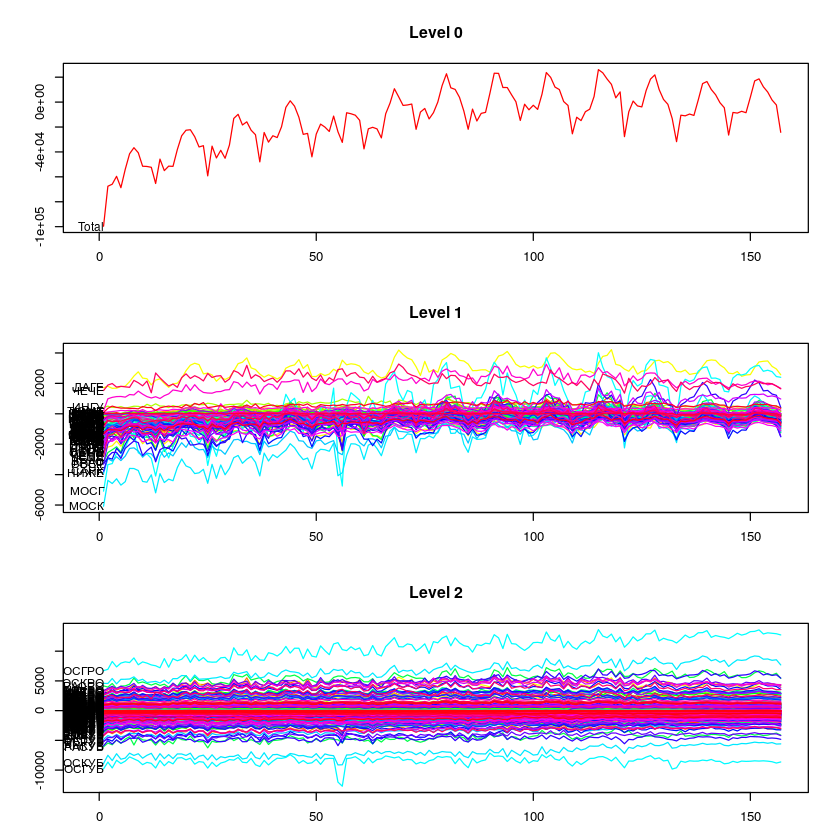

In [269]:
y_f5 = hts(data_f5, characters = c(4,2))

plot(y_f5, levels = c(0, 1, 2))

In [270]:
gts_forecasts_7  <- window(y_f5,  start=133, end=157)

In [271]:
accuracy.gts(gts_forecasts_7, gts_test)

,Total,АДЫГ,АЛТА,АЛТК,АМУР,АРХА,АСТР,БАШК,БЕЛГ,БРЯН,⋯,ЧУКОУВ,ЧУКОУУ,ЯКУТРО,ЯКУТУБ,ЯКУТУВ,ЯКУТУУ,ЯРОСРО,ЯРОСУБ,ЯРОСУВ,ЯРОСУУ
ME,-13736.60008,-29.77819,-6.628798,-251.14153,5.379268,-79.77049,-93.09363,-306.8474,-168.87320,-115.51432,⋯,5.636362,7.235575,-107.35199,25.791214,21.02817,5.001668,-166.18004,102.02866,-76.89243,-5.518727
RMSE,15346.46875,68.60192,43.942665,296.30959,63.321463,132.69095,140.08347,402.0863,194.01021,146.23232,⋯,11.791407,12.399111,137.02715,48.369462,32.41679,16.677337,188.22848,128.44756,103.82574,28.025070
MAE,13736.60008,55.32163,35.918332,251.14153,47.874354,104.86534,107.71951,331.0620,168.87320,122.41464,⋯,9.780838,10.126463,118.63726,36.943207,27.57631,13.896784,168.59142,113.95820,84.86905,22.951856
MAPE,179.05403,Inf,37.900471,34.27019,54.638710,40.06191,126.44236,387.5380,35.16522,21.13624,⋯,105.550671,492.220121,11.20961,8.680953,20.03786,43.794199,16.52537,11.68053,14.52217,171.557714
MPE,59.63339,-Inf,-8.494053,34.27019,-6.539630,26.28773,41.72471,264.3537,35.16522,19.83347,⋯,-74.016431,-284.914122,-10.32657,-6.548375,-15.88501,-19.560955,-16.30988,-10.71931,12.87147,46.199740


In [272]:
cat("ARIMA")
accuracy(gdp_arima, test)[, c(2,5,7,8)]
cat("Auto ARIMA")
accuracy(gdp_auto_arima, test)[, c(2,5,7,8)]

ARIMA

,RMSE,MAPE,ACF1,Theil's U
Training set,5735.156,344.1934,-0.04016493,NA
Test set,16288.313,189.8155,0.68127627,2.451983


Auto ARIMA

,RMSE,MAPE,ACF1,Theil's U
Training set,5834.988,294.9815,-0.04734272,NA
Test set,15444.628,180.0117,0.65862964,2.314673


### COR 

In [273]:
library(TSclust)

In [274]:
corr_mat <- diss(df_eu, "COR")

- "ACF" Autocorrelation-based method. See diss.ACF.

- "AR.LPC.CEPS" Linear Predictive Coding ARIMA method. This method has two value-per-series arguments, the ARIMA order, and the seasonality.See diss.AR.LPC.CEPS.

- "AR.MAH" Model-based ARMA method. See diss.AR.MAH.

- "AR.PIC" Model-based ARMA method. This method has a value-per-series argument, the ARIMA order. See diss.AR.PIC.

- "CDM" Compression-based dissimilarity method. See diss.CDM.

- "CID" Complexity-Invariant distance. See diss.CID.

- "COR" Correlation-based method. See diss.COR.

- "CORT" Temporal Correlation and Raw values method. See diss.CORT.

- "DTWARP" Dynamic Time Warping method. See diss.DTWARP.

- "DWT" Discrete wavelet transform method. See diss.DWT.

- "EUCL" Euclidean distance. See diss.EUCL. For many more convetional distances, see link[stats]{dist}, though you may need to transpose the dataset.

- "FRECHET" Frechet distance. See diss.FRECHET.

- "INT.PER" Integrate Periodogram-based method. See diss.INT.PER.

- "NCD" Normalized Compression Distance. See diss.NCD.

- "PACF" Partial Autocorrelation-based method. See diss.PACF.

- "PDC" Permutation distribution divergence. Uses the pdc package. See pdcDist for additional arguments and details. Note that series given by numeric matrices are interpreted row-wise and not column-wise, opposite as in pdcDist.

- "PER" Periodogram-based method. See diss.PER.

- "PRED" Prediction Density-based method. This method has two value-per-series agument, the logarithm and difference transform. See diss.PRED.

- "MINDIST.SAX" Distance that lower bounds the Euclidean, based on the Symbolic Aggregate approXimation measure. See diss.MINDIST.SAX.

- "SPEC.LLR" Spectral Density by Local-Linear Estimation method. See diss.SPEC.LLR.

- "SPEC.GLK" Log-Spectra Generalized Likelihood Ratio test method. See diss.SPEC.GLK.

- "SPEC.ISD" Intregated Squared Differences between Log-Spectras method. See diss.SPEC.ISD.

In [275]:
diss_mat_dtw  <- matrix(0, nrow = dim(data)[2], ncol = dim(data)[2])
i <- j  <- a  <- 1
while (i < dim(data)[2]){
  
  for (j in (i+1):dim(data)[2]){ 
    # cat("(", j, i, ")")
    diss_mat_dtw[j,i] <-  corr_mat[a]
    a <- a+1
    }
  i <-i+1
  }

In [276]:
diss_mat_dtw  <- diss_mat_dtw + t(diss_mat_dtw)
diag(diss_mat_dtw) <- NA

In [277]:
closests_dtw <- c()

for (i in 1:dim(df_eu)[2]){
    closests_dtw  <-  c(closests_dtw, which.max(diss_mat_dtw[i,]) )
}

In [278]:
names_dtw <- c()

for (i in closests_dtw){
    names_dtw  <-  c(names_dtw, colnames(df_eu)[i])
}

In [279]:
iii  <- 200

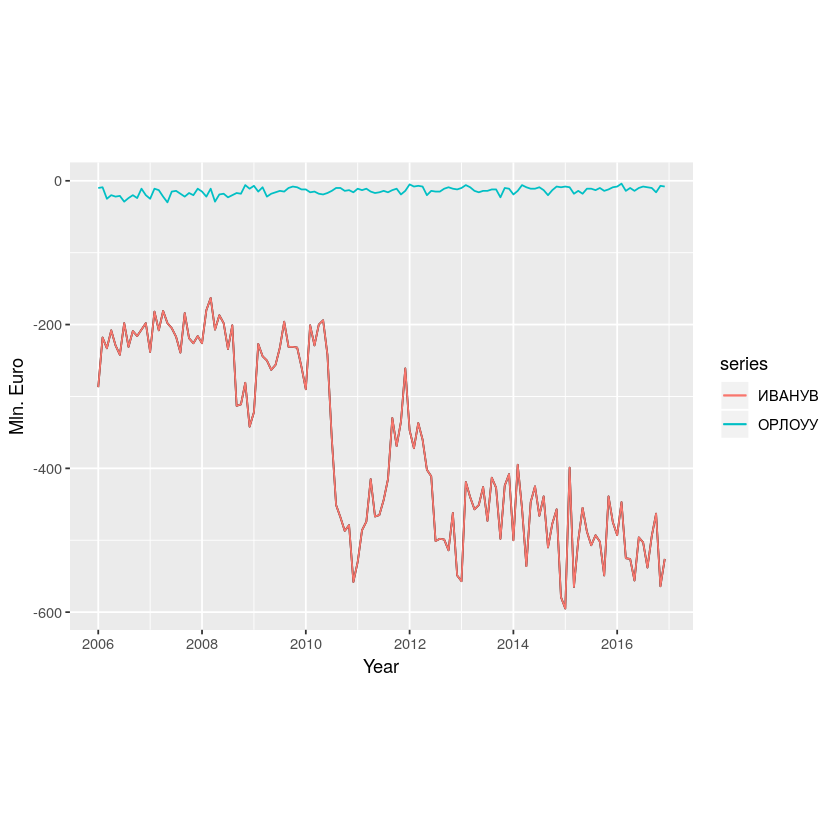

In [280]:
autoplot(ts(df_eu[names_dtw[iii]], frequency = 12, start = 2006)) +
    autolayer(ts(df_eu[names_dtw[iii]], frequency = 12, start = 2006), series=names_dtw[iii]) +
    autolayer(ts(df_eu[iii], frequency = 12, start = 2006), series=colnames(df_eu)[iii]) +
    xlab("Year") + ylab("Mln. Euro") +
    theme(aspect.ratio = 0.75)

In [281]:
length(names_dtw)

[1] 328

In [282]:
names_dtw_1  <-  c(rep(NA, 83), names_dtw)

In [283]:
allts <- aggts(gts_train)

In [284]:
allf <- matrix(, nrow=25, ncol=ncol(allts))

In [285]:
dim(allts)

[1] 132 411

In [286]:
for(i in 1:83){
    model  <- auto.arima(msts(allts[,i], seasonal.periods = 12))
    allf[,i] <- forecast(model, h=25)$mean
}

start_time <- Sys.time()

ms <-  foreach(i=84:ncol(allts)) %dopar% {
    auto.arima(msts(allts[,i], seasonal.periods = 12), stationary = FALSE, seasonal = TRUE, xreg = lag(allts[,names_dtw_1[i]][1:length(allts[,names_dtw_1[i]])]))
    
#     forecast(ms[[i]], h=7)$mean

}
end_time <- Sys.time()
end_time - start_time

Time difference of 8.046076 mins

In [287]:
ms[[1]]

Series: msts(allts[, i], seasonal.periods = 12) 
Regression with ARIMA(1,0,2)(1,0,0)[12] errors 

Coefficients:
         ar1      ma1     ma2    sar1  intercept    xreg
      0.7048  -0.7042  0.3889  0.6990   463.1246  0.1819
s.e.  0.1059   0.1167  0.0938  0.0636    24.4277  0.1295

sigma^2 estimated as 1416:  log likelihood=-662.88
AIC=1339.76   AICc=1340.67   BIC=1359.89

In [288]:
gts_xreg  <- window(y, start=132, end=156)

In [289]:
for(i in 84:ncol(allts)){
    allf[,i] <- forecast(ms[[i-83]], h=25, xreg=gts_xreg[[1]][,names_dtw_1[i]])$mean
    }

Warning message in forecast.Arima(ms[[i - 83]], h = 25, xreg = gts_xreg[[1]][, names_dtw_1[i]]):
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 83]], h = 25, xreg = gts_xreg[[1]][, names_dtw_1[i]]):
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 83]], h = 25, xreg = gts_xreg[[1]][, names_dtw_1[i]]):
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 83]], h = 25, xreg = gts_xreg[[1]][, names_dtw_1[i]]):
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 83]], h = 25, xreg = gts_xreg[[1]][, names_dtw_1[i]]):
“xreg conta

In [290]:
allf <- ts(allf)

In [291]:
colnames(allf)  <-  colnames(allts)  

In [292]:
# combine the forecasts with the group matrix to get a gts object
g <- get_nodes(gts_train)
y.f <- combinef(allf, nodes = g)

In [293]:
forecasts_7 = y.f[[1]]

In [294]:
colnames(forecasts_7) = colnames(y[[1]])

In [295]:
data_f5 = rbind(gts_train[[1]], forecasts_7)

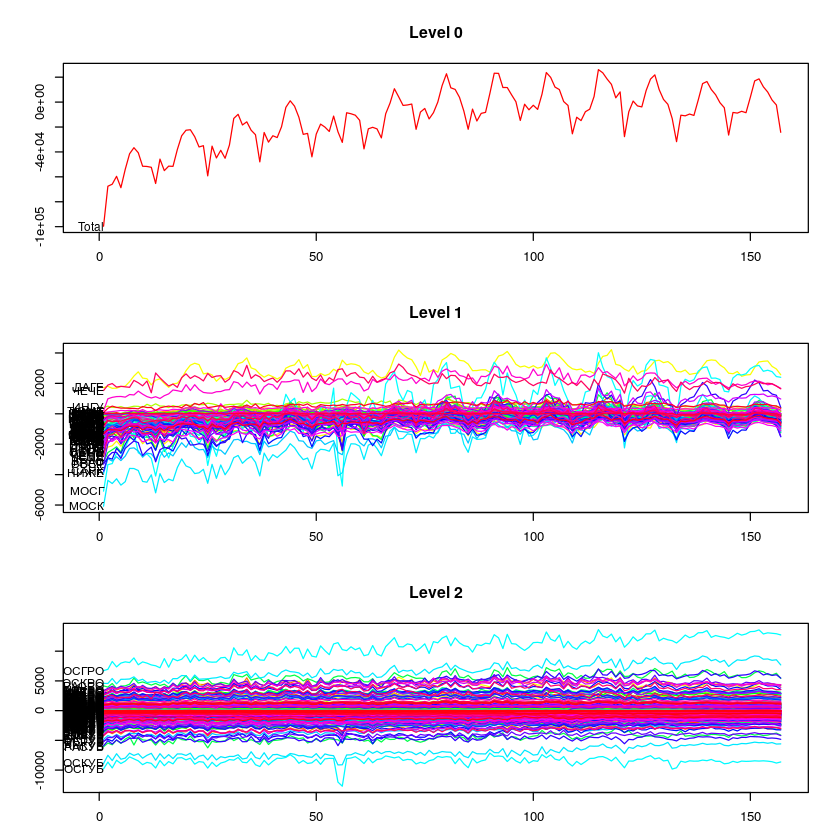

In [296]:
y_f5 = hts(data_f5, characters = c(4,2))

plot(y_f5, levels = c(0, 1, 2))

In [297]:
gts_forecasts_7  <- window(y_f5, start=133, end=157)

In [298]:
accuracy.gts(gts_forecasts_7, gts_test)

,Total,АДЫГ,АЛТА,АЛТК,АМУР,АРХА,АСТР,БАШК,БЕЛГ,БРЯН,⋯,ЧУКОУВ,ЧУКОУУ,ЯКУТРО,ЯКУТУБ,ЯКУТУВ,ЯКУТУУ,ЯРОСРО,ЯРОСУБ,ЯРОСУВ,ЯРОСУУ
ME,-13736.60008,-29.77819,-6.628798,-251.14153,5.379268,-79.77049,-93.09363,-306.8474,-168.87320,-115.51432,⋯,5.636362,7.235575,-107.35199,25.791214,21.02817,5.001668,-166.18004,102.02866,-76.89243,-5.518727
RMSE,15346.46875,68.60192,43.942665,296.30959,63.321463,132.69095,140.08347,402.0863,194.01021,146.23232,⋯,11.791407,12.399111,137.02715,48.369462,32.41679,16.677337,188.22848,128.44756,103.82574,28.025070
MAE,13736.60008,55.32163,35.918332,251.14153,47.874354,104.86534,107.71951,331.0620,168.87320,122.41464,⋯,9.780838,10.126463,118.63726,36.943207,27.57631,13.896784,168.59142,113.95820,84.86905,22.951856
MAPE,179.05403,Inf,37.900471,34.27019,54.638710,40.06191,126.44236,387.5380,35.16522,21.13624,⋯,105.550671,492.220121,11.20961,8.680953,20.03786,43.794199,16.52537,11.68053,14.52217,171.557714
MPE,59.63339,-Inf,-8.494053,34.27019,-6.539630,26.28773,41.72471,264.3537,35.16522,19.83347,⋯,-74.016431,-284.914122,-10.32657,-6.548375,-15.88501,-19.560955,-16.30988,-10.71931,12.87147,46.199740


In [299]:
cat("ARIMA")
accuracy(gdp_arima, test)[, c(2,5,7,8)]
cat("Auto ARIMA")
accuracy(gdp_auto_arima, test)[, c(2,5,7,8)]

ARIMA

,RMSE,MAPE,ACF1,Theil's U
Training set,5735.156,344.1934,-0.04016493,NA
Test set,16288.313,189.8155,0.68127627,2.451983


Auto ARIMA

,RMSE,MAPE,ACF1,Theil's U
Training set,5834.988,294.9815,-0.04734272,NA
Test set,15444.628,180.0117,0.65862964,2.314673


### ACF 

In [300]:
library(TSclust)

In [302]:
df_eu = read.csv(file="hts_rus_summed.csv", header=TRUE, sep=",", row.names =1 )

In [303]:
df_eu  <- df_eu[1:132, order(names(df_eu))]
df_eu <- data.frame(diff(as.matrix(df_eu)))

In [304]:
corr_mat <- diss(df_eu, "ACF")

In [305]:
diss_mat_dtw  <- matrix(0, nrow = dim(data)[2], ncol = dim(data)[2])
i <- j  <- a  <- 1
while (i < dim(data)[2]){
  
  for (j in (i+1):dim(data)[2]){ 
    # cat("(", j, i, ")")
    diss_mat_dtw[j,i] <-  corr_mat[a]
    a <- a+1
    }
  i <-i+1
  }

In [306]:
diss_mat_dtw  <- diss_mat_dtw + t(diss_mat_dtw)
diag(diss_mat_dtw) <- NA

In [307]:
closests_dtw <- c()

for (i in 1:dim(df_eu)[2]){
    closests_dtw  <-  c(closests_dtw, which.max(diss_mat_dtw[i,]) )
}

In [308]:
names_dtw <- c()

for (i in closests_dtw){
    names_dtw  <-  c(names_dtw, colnames(df_eu)[i])
}

In [309]:
iii  <- 270

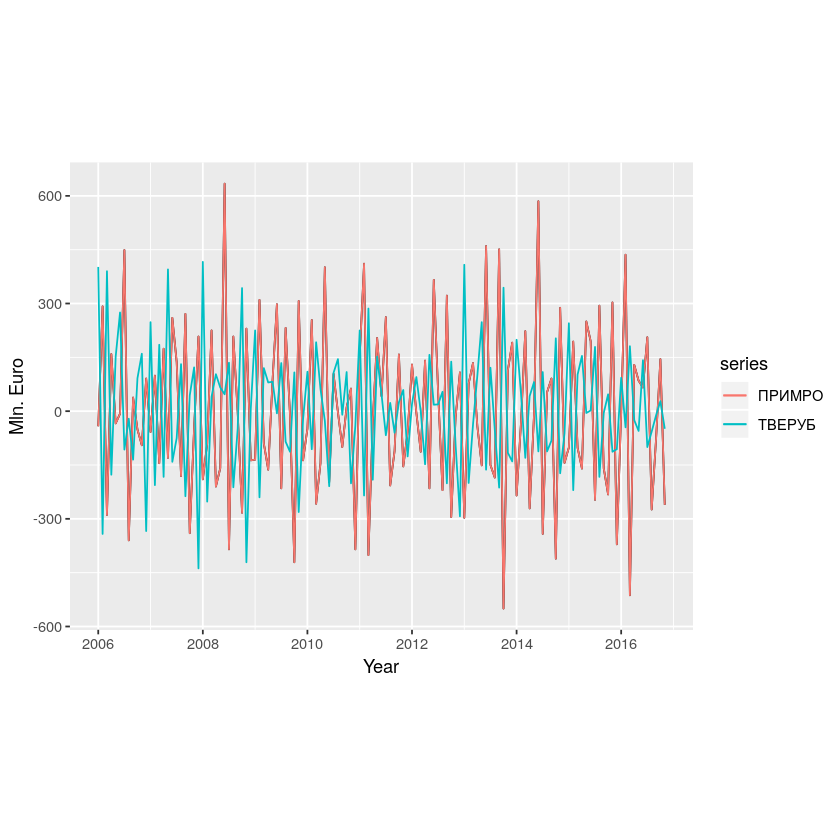

In [310]:
autoplot(ts(df_eu[names_dtw[iii]], frequency = 12, start = 2006)) +
    autolayer(ts(df_eu[names_dtw[iii]], frequency = 12, start = 2006), series=names_dtw[iii]) +
    autolayer(ts(df_eu[iii], frequency = 12, start = 2006), series=colnames(df_eu)[iii]) +
    xlab("Year") + ylab("Mln. Euro") +
    theme(aspect.ratio = 0.75)

In [311]:
length(names_dtw)

[1] 328

In [312]:
names_dtw_1  <-  c(rep(NA, 83), names_dtw)

In [313]:
allts <- aggts(gts_train)

In [314]:
allf <- matrix(, nrow=25, ncol=ncol(allts))

In [315]:
dim(allts)

[1] 132 411

In [316]:
for(i in 1:83){
    model  <- auto.arima(msts(allts[,i], seasonal.periods = 12))
    allf[,i] <- forecast(model, h=25)$mean
}

start_time <- Sys.time()

ms <-  foreach(i=84:ncol(allts)) %dopar% {
    auto.arima(msts(allts[,i], seasonal.periods = 12), stationary = FALSE, seasonal = TRUE, xreg = lag(allts[,names_dtw_1[i]][1:length(allts[,names_dtw_1[i]])]))
    
#     forecast(ms[[i]], h=7)$mean

}
end_time <- Sys.time()
end_time - start_time

Time difference of 9.498399 mins

In [317]:
ms[[1]]

Series: msts(allts[, i], seasonal.periods = 12) 
Regression with ARIMA(1,0,2)(1,0,0)[12] errors 

Coefficients:
         ar1      ma1     ma2    sar1  intercept     xreg
      0.6905  -0.6828  0.3428  0.6891   437.6691  -0.6215
s.e.  0.1154   0.1273  0.1042  0.0648    20.0636   0.6259

sigma^2 estimated as 1430:  log likelihood=-663.34
AIC=1340.68   AICc=1341.59   BIC=1360.8

In [318]:
gts_xreg  <- window(y, start=132, end=156)

In [319]:
for(i in 84:ncol(allts)){
    allf[,i] <- forecast(ms[[i-83]], h=25, xreg=gts_xreg[[1]][,names_dtw_1[i]])$mean
    }

Warning message in forecast.Arima(ms[[i - 83]], h = 25, xreg = gts_xreg[[1]][, names_dtw_1[i]]):
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 83]], h = 25, xreg = gts_xreg[[1]][, names_dtw_1[i]]):
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 83]], h = 25, xreg = gts_xreg[[1]][, names_dtw_1[i]]):
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 83]], h = 25, xreg = gts_xreg[[1]][, names_dtw_1[i]]):
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 83]], h = 25, xreg = gts_xreg[[1]][, names_dtw_1[i]]):
“xreg conta

In [320]:
allf <- ts(allf)

In [321]:
colnames(allf)  <-  colnames(allts)  

In [322]:
# combine the forecasts with the group matrix to get a gts object
g <- get_nodes(gts_train)
y.f <- combinef(allf, nodes = g)

In [323]:
forecasts_7 = y.f[[1]]

In [324]:
colnames(forecasts_7) = colnames(y[[1]])

In [325]:
data_f5 = rbind(gts_train[[1]], forecasts_7)

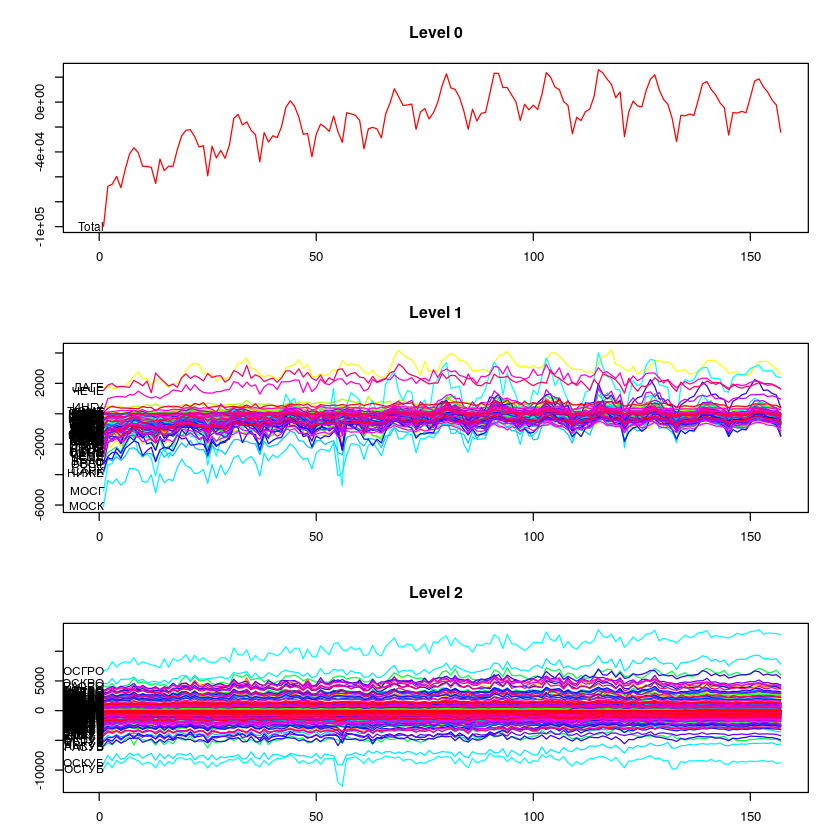

In [326]:
y_f5 = hts(data_f5, characters = c(4,2))

plot(y_f5, levels = c(0, 1, 2))

In [327]:
gts_forecasts_7  <- window(y_f5, start=133, end=157)

In [328]:
accuracy.gts(gts_forecasts_7, gts_test)

,Total,АДЫГ,АЛТА,АЛТК,АМУР,АРХА,АСТР,БАШК,БЕЛГ,БРЯН,⋯,ЧУКОУВ,ЧУКОУУ,ЯКУТРО,ЯКУТУБ,ЯКУТУВ,ЯКУТУУ,ЯРОСРО,ЯРОСУБ,ЯРОСУВ,ЯРОСУУ
ME,-13720.32709,-39.76201,-11.59927,-258.1168,4.445536,-82.68245,-94.75637,-267.0437,-178.21882,-125.07875,⋯,3.319824,4.751103,-126.26525,11.710627,29.88489,9.715757,-232.84603,99.82249,43.054631,-39.33676
RMSE,15329.85430,74.39347,44.57792,304.3609,63.523715,135.52909,138.33584,356.3066,202.82185,153.68059,⋯,11.711915,10.959874,158.39290,44.353844,38.42073,18.851159,254.00951,122.93046,77.388216,47.43761
MAE,13720.32709,60.52707,35.52003,258.1168,47.626339,106.66095,107.13369,292.1029,178.21882,130.78592,⋯,9.543747,8.956215,136.52182,32.268153,32.40513,15.100715,233.62589,106.41671,58.203845,39.71100
MAPE,178.85665,Inf,37.54416,35.4489,54.650778,40.67278,125.94101,333.4575,36.97197,22.79643,⋯,101.551888,469.036779,12.91911,7.490256,23.68865,50.716480,22.82337,10.95461,11.366479,294.67682
MPE,59.56898,-Inf,-13.98146,35.4489,-7.160441,27.27618,45.20620,235.0034,36.97197,21.76042,⋯,-50.542212,-165.843941,-12.12770,-3.516143,-22.12220,-37.426796,-22.75368,-10.42471,-8.848928,292.25800


In [329]:
cat("ARIMA")
accuracy(gdp_arima, test)[, c(2,5,7,8)]
cat("Auto ARIMA")
accuracy(gdp_auto_arima, test)[, c(2,5,7,8)]

ARIMA

,RMSE,MAPE,ACF1,Theil's U
Training set,5735.156,344.1934,-0.04016493,NA
Test set,16288.313,189.8155,0.68127627,2.451983


Auto ARIMA

,RMSE,MAPE,ACF1,Theil's U
Training set,5834.988,294.9815,-0.04734272,NA
Test set,15444.628,180.0117,0.65862964,2.314673


#### Структурные сдвиги

In [330]:
length(names_dtw)

[1] 328

In [331]:
names_dtw_1  <-  c(rep(NA, 83), names_dtw)

In [332]:
allts <- aggts(gts_train)

In [333]:
allf <- matrix(, nrow=25, ncol=ncol(allts))

In [334]:
dim(allts)

[1] 132 411

In [335]:
dum2  <-  rep(c(0,1), c(83,length(gdp_agg)-83))

In [336]:
length(dum2)

[1] 157

In [237]:
for(i in 1:29){
    model  <- auto.arima(msts(allts[,i], seasonal.periods = 4))
    allf[,i] <- forecast(model, h=7)$mean
}

start_time <- Sys.time()

ms <-  foreach(i=30:ncol(allts)) %dopar% {
    auto.arima(msts(allts[,i], seasonal.periods = 4), stationary = FALSE, seasonal = TRUE, lambda="auto", 
               xreg = cbind(lag(allts[,names_dtw_1[i]][1:length(allts[,names_dtw_1[i]])]), dum2[1:length(allts[,names_dtw_1[i]])] ))
    
#     forecast(ms[[i]], h=7)$mean

}
end_time <- Sys.time()
end_time - start_time

Time difference of 43.5446 secs

In [238]:
gts_xreg  <- window(y, start=68, end=74)

In [239]:
gts_xreg[[1]][,names_dtw_1[40]]

Time Series:
Start = 68 
End = 74 
Frequency = 1 
[1] 862.2333 780.6667 859.4000 853.2000 938.3667 868.7000 891.3000

In [240]:
gts_test[[1]][,names_dtw_1[40]]

Time Series:
Start = 69 
End = 75 
Frequency = 1 
[1] 780.6667 859.4000 853.2000 938.3667 868.7000 891.3000 863.8667

In [242]:
gts_xreg[[1]]

ATA,ATB,ATF,ATG,ATJ,ATK,ATL,ATM,ATO,ATR,⋯,UKA,UKB,UKF,UKG,UKJ,UKK,UKL,UKM,UKO,UKR
890.65,18278.45,5636.35,18565.85,2998.15,3189.70,7904.5,8306.70,14122.05,2237.40,⋯,3323.65,72454.20,30703.15,91192.45,33578.05,38161.05,70084.45,63600.60,91625.65,20923.85
1032.50,18015.20,4390.55,18906.95,2880.50,3258.00,7967.9,7465.85,14273.20,2244.90,⋯,3593.20,74976.45,32247.20,92446.70,33022.10,37845.45,71591.35,64389.20,93525.10,22228.50
1208.75,18062.45,5216.15,18474.10,2845.80,3310.65,8061.5,7915.60,14331.90,2282.15,⋯,3615.05,72490.50,32127.95,93377.80,33488.40,38390.70,71643.90,65204.65,92618.90,22955.00
1125.85,18052.40,5518.70,18964.35,2867.35,3328.30,8185.6,8189.55,14357.40,2286.30,⋯,3290.30,69756.30,31179.90,90968.40,32466.95,35160.20,68963.80,63846.80,89371.70,22184.45
1095.15,18552.40,5889.15,19302.15,3136.15,3411.65,8317.5,8696.40,14548.85,2289.10,⋯,3378.20,74501.55,31978.10,92240.05,35133.15,36637.70,70413.95,66323.50,91696.25,22157.45
1147.10,18831.85,4648.55,19759.20,2995.55,3480.65,8433.5,8103.90,14867.15,2305.95,⋯,3467.95,76036.10,32183.00,92376.35,34535.95,37067.70,71376.10,66695.15,93150.65,21995.30
1260.70,19012.10,5511.85,19309.20,2948.00,3284.10,8550.5,8368.50,14866.70,2336.80,⋯,3453.15,74990.30,32316.00,95326.80,34636.35,38043.85,71174.80,67987.00,92593.80,22362.90


In [244]:
i = 30
gts_xreg[[1]][,'ATA']
gts_xreg[[1]][,names_dtw_1[i]]

Time Series:
Start = 68 
End = 74 
Frequency = 1 
[1]  890.65 1032.50 1208.75 1125.85 1095.15 1147.10 1260.70

Time Series:
Start = 68 
End = 74 
Frequency = 1 
[1] 1015.8333  962.7333 1101.1333 1203.1333 1076.8667 1024.1000 1158.1333

In [245]:
for(i in 30:ncol(allts)){
    allf[,i] <- forecast(ms[[i-29]], h=7, xreg=cbind(gts_xreg[[1]][,names_dtw_1[i]], dum2[69:75] ))$mean
    }

Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in traini

“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecas

“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecas

“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecas

“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecas

“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecas

“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecast.Arima(ms[[i - 29]], h = 7, xreg = cbind(gts_xreg[[1]][, :
“xreg contains different column names from the xreg used in training. Please check that the regressors are in the same order.”Warning message in forecas

In [246]:
allf <- ts(allf)

In [247]:
colnames(allf)  <-  colnames(allts)  

In [248]:
# combine the forecasts with the group matrix to get a gts object
g <- get_nodes(gts_train)
y.f <- combinef(allf, nodes = g)

In [249]:
forecasts_7 = y.f[[1]]

In [250]:
colnames(forecasts_7) = colnames(y[[1]])

In [251]:
data_f5 = rbind(gts_train[[1]], forecasts_7)

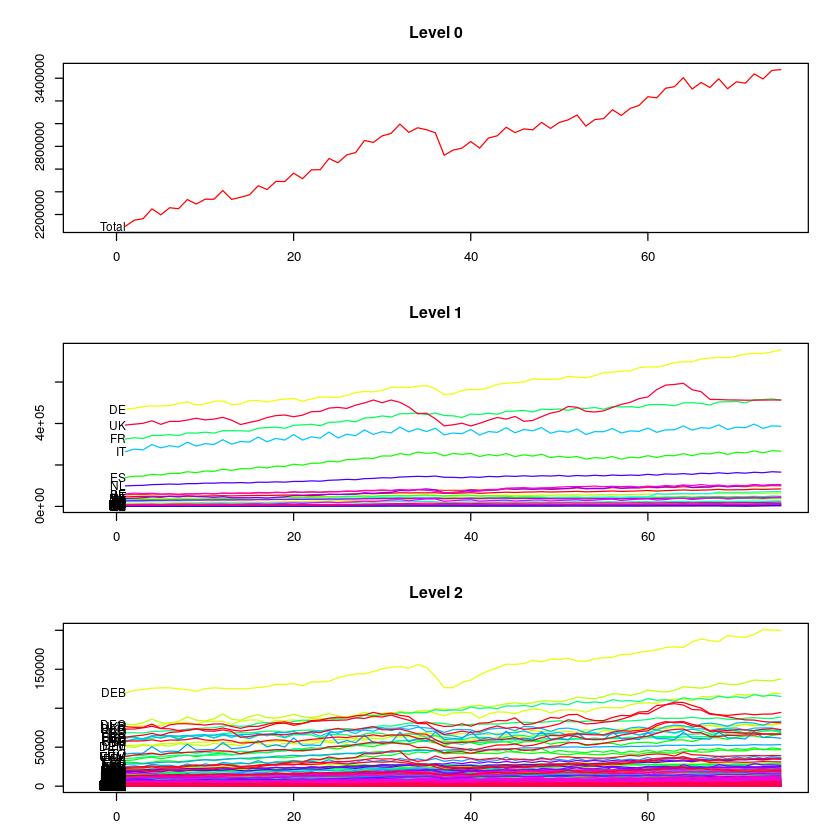

In [252]:
y_f5 = hts(data_f5, characters = c(2,1))

plot(y_f5, levels = c(0, 1, 2))

In [253]:
gts_forecasts_7  <- window(y_f5, start=69, end=75)

In [254]:
accuracy.gts(gts_forecasts_7, gts_test)

,Total,AT,BE,BG,CY,CZ,DE,DK,EE,EL,⋯,UKA,UKB,UKF,UKG,UKJ,UKK,UKL,UKM,UKO,UKR
ME,71822.413511,1844.721971,1169.768095,780.99170,467.38548,3279.982568,12329.386252,709.780580,572.00739,2358.907289,⋯,-1850.72168,1420.970948,977.765066,8646.414441,-800.363546,-1972.431512,2912.086426,2.701077e+01,-250.1311144,2527.71880
RMSE,72877.570958,1930.196190,1319.431669,939.59036,752.35868,3482.357023,12833.806090,1303.921837,789.04481,2399.211446,⋯,1955.18704,2473.794931,1007.065939,9419.943501,978.196354,2308.148105,3081.237988,1.028587e+03,1936.5871295,2563.36230
MAE,71822.413511,1844.721971,1169.768095,780.99170,637.00616,3279.982568,12329.386252,1119.392253,635.10743,2358.907289,⋯,1850.72168,2129.947181,977.765066,8646.414441,800.363546,1972.431512,2912.086426,8.281267e+02,1437.1327703,2527.71880
MAPE,2.064658,2.189671,1.189508,6.86204,14.82653,7.282918,1.638406,1.760120,12.33558,5.923822,⋯,54.73213,2.875286,3.044809,9.218253,2.397229,5.433696,4.105584,1.258032e+00,1.5684101,11.33487
MPE,2.064658,2.189671,1.189508,6.86204,11.07443,7.282918,1.638406,1.119822,11.20633,5.923822,⋯,-54.73213,1.859144,3.044809,9.218253,-2.397229,-5.433696,4.105584,8.285940e-03,-0.2959521,11.33487


72868.3266

In [255]:
cat("ARIMA")
accuracy(gdp_arima, test)[, c(2,5,7,8)]
cat("Auto ARIMA")
accuracy(gdp_auto_arima, test)[, c(2,5,7,8)]

ARIMA

,RMSE,MAPE,ACF1,Theil's U
Training set,21785.78,0.5747027,0.07492727,NA
Test set,67549.13,1.8853066,0.20566073,1.124845


Auto ARIMA

,RMSE,MAPE,ACF1,Theil's U
Training set,26037.71,0.7036918,0.01152308,NA
Test set,71543.72,2.0273982,0.34491357,1.179147
